# West Nile Virus Prediction

## Introduction

West Nile virus is a virus that causes West Nile fever. It is most commonly spread to humans through infected mosquitos. Around 20% of people who become infected with the virus develop symptoms ranging from a persistent fever, to serious neurological illnesses that can result in death.

In Chicago, the first human cases of West Nile virus were reported in 2002. By 2004 the City of Chicago and the Chicago Department of Public Health (CDPH) established a comprehensive surveillance and control program against West Nile virus. Every week from late spring through the fall, mosquitos in traps across the city are tested for the virus. The results of these tests have been collected over the years. 


### Problem Statement

As analysts in Disease And Treatment Agency, we will be analyzing how weather conditions and environmental factors are affecting spatiotemporal variance of mosquito presence. The goal of this project is to develop a robust and efficient model using weather and environmental data to predict the presence of WNV and produce a list of WNV locations and recommend strategies to spray pesticides to control WNV. Public health managers could use prediction maps and cost benefit analysis to guide ongoing decisions about when and where to focus intervention strategies for WNV.

The aim of the project will be to predict the most number of true positives (actual potential WNV locations) while minimizing number of false positives to reduce cost of spraying. As such, ROC-AUC score will be the main evaluation matrix for this project. 


### Executive Summary

The most important features to identify if a place will have Wile Nile virus is the location features. Other than that weather data such as average wind speed, sea level and average temperature are also important in the prediction. Other important factors include time, such as week of the year and the year itself, and also the species of the mosquito, specifically whether the Culex Restuans species is present.

Using the train data set and external research paper, a preliminary socio-economic cost was estimated to be USD 4,909,695 and an estimated spray cost prediction was USD 413,424 or 8.4% of socio-economic cost.
Once the predictions are derived, a cost benefit analysis was done looking at various options of spray strategies. The results were compared with the preliminary cost analysis done on the train data set to arrive at the recommended options.

Spray only predicted locations for each month but only for Aug and Sep (Option 4), maximize the cost benefits at an estimated USD 263,088 or 5.4% of projected socio-economic cost while taking a higher risk of increase in WnvPresent location.
On the other hand, Spray all predicted locations for all four months (Option 1), minimizes this risk while taking on a higher cost of spray at an estimated USD 413,424 or 11.99% of projected socio-economic cost.

It is recommended that the City of Chicago and CPHD take a collective review of the options to arrive at a viable decision.

### Contents
- [Introduction](#Introduction)
    - [Problem Statement](#Problem-Statement)
    - [Executive Summary](#Executive-Summary)
    - [Datasets Used](#Datasets-Used)
- [Project Prerequisites](#Project-Prerequisites)
    - [Import necessary libraries](#Import-necessary-libraries)
    - [Import Data Files](#Import-Data-Files)
- [Weather Data Cleaning](#Weather-Data-Cleaning)
    - [Special Symbol - 'M'](#Special-Symbol---'M')
    - [Special Symbol - 'T'](#Special-Symbol---'T')
    - [Special Symbol '-'](#Special-Symbol-'-')
    - [Fix Data Type](#Fix-Data-Type)
    - [Create Timeseries features](#Create-Timeseries-features)
    - [Merge Train and Weather Data](#Merge-Train-and-Weather-Data)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
    - [Understanding Target Variable](#Understanding-Target-Variable)
    - [Time Variables](#Time-Variables)
    - [Species Variables](#Species-Variables)
    - [Location Variables](#Location-Variables)
    - [Temperature Variables](#Temperature-Variables)
    - [Humidity Variables](#Humidity-Variables)
    - [Precipitation](#Precipitation)
    - [Wind Variables](#Wind-Variables)
    - [Other Conditions](#Other-Conditions)
- [Prepare Test File](#Prepare-Test-File)
    - [Merge Test and Weather Data](#Merge-Test-and-Weather-Data)
    - [EDA on Test Data](#EDA-on-Test-Data)
- [Prepare CSV Files for Modeling](#Prepare-CSV-Files-for-Modeling)

### Datasets Used

Detailed weather data from 2007 to 2014 and location data on WNV cases is made available for this project. There are total of 4 datasets with close to 120,000 data points. Total number of original features available for this analysis is 38. 

This analysis will start with exploratory data analysis to observe the pattern and relationship between features and our target variable and followed by detailed feature selection process and explanation of modeling results.

| Name                   | Dataset    | Type     | Description                                                                                                                                                                                                                                                  |
|------------------------|------------|----------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Id                     | train/test | int      | ID number of the record                                                                                                                                                                                                                                      |
| Date                   | train/test | datetime | Date the WNV test was performed                                                                                                                                                                                                                              |
| Address                | train/test | datetime | Approximate trap address retrieved from   GeoCoder                                                                                                                                                                                                           |
| Species                | train/test | str      | Mosquito species in trap                                                                                                                                                                                                                                     |
| Block                  | train/test | str      | Block Number of address                                                                                                                                                                                                                                      |
| Street                 | train/test | str      | Street of address                                                                                                                                                                                                                                            |
| Trap                   | train/test | str      | ID number of the trap                                                                                                                                                                                                                                        |
| AddressNumberAndStreet | train/test | str      | Approximate address retrieved from   GeoCoder                                                                                                                                                                                                                |
| Latitude               | train/test | float    | Latitude retrieved from GeoCoder                                                                                                                                                                                                                             |
| Longitude              | train/test | float    | Longitude retrieved from GeoCoder                                                                                                                                                                                                                            |
| AddressAccuracy        | train/test | int      | Accuracy of information returned from   GeoCoder                                                                                                                                                                                                             |
| NumMosquitos           | train      | int      | Number of mosquitoes in a sample                                                                                                                                                                                                                             |
| WnvPresent             | train      | int      | Whether or not WNV is present in a sample   (1 = present; 0 = absent)                                                                                                                                                                                        |
| Station                | weather    | str      | Station 1 or 2                                                                                                                                                                                                                                               |
| Date                   | weather    | datetime | Date of measurement (YY/MM/DD)                                                                                                                                                                                                                               |
| Tmax                   | weather    | float    | The highest temperature for the day in   degrees Fahrenheit (F).                                                                                                                                                                                             |
| Tmin                   | weather    | float    | The lowest temperature for the day in   degrees Fahrenheit (F).                                                                                                                                                                                              |
| Tavg                   | weather    | float    | The average temperature for the day in degrees Fahrenheit (F).                                                                                                                                                                                               |
| Depart                 | weather    | float    | Departure from normal temperature. The difference between column 4 and   the 30 year normal temperature for this date. A minus (-) is number of   degrees below normal. A zero (0) indicates that the average for that day was   the normal temperature. (F) |
| DewPoint               | weather    | float    | Average Dew Point temperature (F)                                                                                                                                                                                                                            |
| WetBulb                | weather    | float    | Average Wet Bulb temperature (F)                                                                                                                                                                                                                             |
| Heat                   | weather    | float    | Heating Degree Days base 65F, season begins with July.                                                                                                                                                                                                       |
| Cool                   | weather    | float    | Cooling Degree Days base 65F, season begins with January.                                                                                                                                                                                                    |
| Sunrise                | weather    | float    | Time of sunrise                                                                                                                                                                                                                                              |
| Sunset                 | weather    | float    | Time of sunset                                                                                                                                                                                                                                               |
| CodeSum                | weather    | str      | Significant weather phenomena                                                                                                                                                                                                                                |
| Depth                  | weather    | float    | Snow depth on the ground to the nearest inch                                                                                                                                                                                                                 |
| Water1                 | weather    | float    | Water Equivalent in inches                                                                                                                                                                                                                                   |
| SnowFall               | weather    | float    | Total snowfall for the day to the nearest tenth of an inch.                                                                                                                                                                                                  |
| PrecipTotal            | weather    | float    | Total  precipitation for the day to the nearest hundredth of an   inch. This includes all forms of precipitation, both liquid and water   equivalent of any snow or ice that occurred                                                                        |
| StnPressure            | weather    | float    | Average station pressure in hg (inches)                                                                                                                                                                                                                      |
| SeaLevel               | weather    | float    | Average sea level pressure in hg (inches)                                                                                                                                                                                                                    |
| ResultSpeed            | weather    | float    | Resultant Wind Speed - Vector sum of wind speeds divided by number of   observations (MPH)                                                                                                                                                                   |
| ResultDir              | weather    | float    | Resultant Wind Direction - Vector sum of wind divided by number of   observations (in tens of degrees)                                                                                                                                                       |
| AvgSpeed               | weather    | float    | Average wind speed (MPH)                                                                                                                                                                                                                                     |
| Date                   | spray      | datetime | The date the pesticide was sprayed (YY/MM/DD)                                                                                                                                                                                                                |
| Time                   | spray      | datetime | Time of spray                                                                                                                                                                                                                                                |
| Latitude               | spray      | float    | The latitude of the location sprayed.                                                                                                                                                                                                                        |
| Longitude              | spray      | float    | The longitude of the location sprayed.                        



## Project Prerequisites

### Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from datetime import datetime
from datetime import timedelta
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

pd.set_option('display.float_format', lambda x:'{:.3f}'.format(x))
pd.set_option('max_colwidth', 1000)
pd.set_option('max_columns', 90)

### Import Data Files

In [ ]:
train = pd.read_csv('assets/train.csv')
test = pd.read_csv('assets/test.csv')
weather = pd.read_csv('assets/weather.csv')
spray = pd.read_csv('assets/spray.csv')

In [ ]:
print(f'datasets info')
print('--------------------------------------')
print(f'train   datapoints: {train.shape[0]},   features: {train.shape[1]}')
print(f'test    datapoints: {test.shape[0]},  features: {test.shape[1]}')
print(f'weather datapoints: {weather.shape[0]},    features: {weather.shape[1]}')

datasets info
--------------------------------------
train   datapoints: 10506,   features: 12
test    datapoints: 116293,  features: 11
weather datapoints: 2944,    features: 22


## Weather Data Cleaning

In [ ]:
print(f'Null values in weather dataset: {weather.isnull().sum().sum()}')

Null values in weather dataset: 0


### Special Symbol - 'M'

'M' stands for missing values in this dataset. 

In [ ]:
cols = list(weather.columns)
m_pct = {}
datapoints = weather.shape[0]
for col in cols:
    m_pct[col]=weather.isin(['M'])[col].sum()/datapoints*100

In [ ]:
m_pct = pd.DataFrame(m_pct.values(), index=m_pct.keys(), columns=['M_pct'])

In [ ]:
m_pct[m_pct['M_pct']>0].sort_values(by='M_pct', ascending=False)

,M_pct
Water1,100.000
Depart,50.000
Depth,50.000
SnowFall,50.000
Tavg,0.374
Heat,0.374
Cool,0.374
SeaLevel,0.306
WetBulb,0.136
StnPressure,0.136


Notice that we have four columns with a lot of missing values: Depart, Depth, Water1 and Snowfall. There are handful missing values in Tavg, Wetbulb, Heat, Cool, Preciptotal, Stnpressure, Sealevel, and Avgspeed columns. 

In [ ]:
weather[weather['Water1']=='M']['Station'].value_counts()

1    1472
2    1472
Name: Station, dtype: int64

In [ ]:
weather[weather['Depart']=='M']['Station'].value_counts()

2    1472
Name: Station, dtype: int64

In [ ]:
weather[weather['Depth']=='M']['Station'].value_counts()

2    1472
Name: Station, dtype: int64

In [ ]:
weather[weather['SnowFall']=='M']['Station'].value_counts()

2    1472
Name: Station, dtype: int64

It is observed that all missing values for Dpart, Depth and SnowFall columns are from weather station 2 and all values in Water1 column are missing. Therefore, following imputation steps will be taken:
- drop Water1 column
- impute missing values for station 2 from station 1

In [ ]:
for i in range(int(len(weather)/2)):
    weather.loc[i*2 + 1, 'Depart'] = weather.loc[i*2, 'Depart']

In [ ]:
for i in range(int(len(weather)/2)):
    weather.loc[i*2 + 1, 'Depth'] = weather.loc[i*2, 'Depth']

In [ ]:
for i in range(int(len(weather)/2)):
    weather.loc[i*2 + 1, 'SnowFall'] = weather.loc[i*2, 'SnowFall']

In [ ]:
weather.drop(columns=['Water1'], inplace=True)

Tavg is the average temperature of Tmax and Tmin. 

In [ ]:
tavg_rows = weather[weather['Tavg']=='M'].index

In [ ]:
for row in tavg_rows:
    weather.loc[row, 'Tavg'] = int((weather.loc[row, 'Tmax']-weather.loc[row, 'Tmin'])/2)+1

Notice that some of the average temperature are wrongly calculated. We will correct them here. 

In [ ]:
weather['Tavg'] = (weather['Tmax'] + weather['Tmin'])//2 + ((weather['Tmax'] + weather['Tmin'])%2>0)

Missing data in 'WetBulb' column

In [ ]:
weather[weather['WetBulb']=='M']

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
848,1,2009-06-26,86,69,78,7,60,M,0,13,0418,1931,,0,0.0,0.00,M,29.85,6.400,4,8.2
2410,1,2013-08-10,81,64,73,0,57,M,0,8,0454,1900,,0,0.0,0.00,M,30.08,5.300,5,6.5
2412,1,2013-08-11,81,60,71,-2,61,M,0,6,0455,1859,RA,0,0.0,0.01,29.35,30.07,2.000,27,3.0
2415,2,2013-08-12,85,69,77,2,63,M,0,12,-,-,RA,0,0.0,0.66,29.27,29.92,4.500,26,7.7


In [ ]:
for i in [848, 2410, 2412]:
    weather.loc[i,'WetBulb']=weather.loc[i+1,'WetBulb']
weather.loc[2415,'WetBulb']=weather.loc[2414,'WetBulb']

'Heat' and 'Cool' refers to heating or cooling is required to feel comfortable. Baseline is 65 Fahrenheit.
- From January June, heating is required
- From July to December, cooling is required

In [ ]:
weather[weather['Heat']=='M']

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
7,2,2007-05-04,78,51,65,4,42,50,M,M,-,-,,0,0.0,0.00,29.36,30.04,10.100,7,10.4
505,2,2008-07-08,86,46,66,5,68,71,M,M,-,-,TS RA,0,0.0,0.28,29.16,29.80,7.400,24,8.3
675,2,2008-10-01,62,46,54,-4,41,47,M,M,-,-,,0,0.0,0.00,29.30,29.96,10.900,33,11.0
1637,2,2011-07-22,100,71,86,5,70,74,M,M,-,-,TS TSRA BR,0,0.0,0.14,29.23,29.86,3.800,10,8.2
2067,2,2012-08-22,84,72,78,-1,51,61,M,M,-,-,,0,0.0,0.00,29.39,M,4.700,19,M
2211,2,2013-05-02,71,42,57,-5,39,45,M,M,-,-,,0,0.0,0.00,29.51,30.17,15.800,2,16.1
2501,2,2013-09-24,91,52,72,-1,48,54,M,M,-,-,,0,0.0,0.00,29.33,30.00,5.800,9,7.7
2511,2,2013-09-29,84,53,69,1,48,54,M,M,-,-,RA BR,0,0.0,0.22,29.36,30.01,6.300,36,7.8
2525,2,2013-10-06,76,48,62,-1,44,50,M,M,-,-,RA DZ BR,0,0.0,0.06,29.10,29.76,10.100,25,10.6
2579,2,2014-05-02,80,47,64,-4,43,47,M,M,-,-,RA,0,0.0,0.04,29.10,29.79,10.700,23,11.9


In [ ]:
print(weather[weather['Heat']=='M'].index)
print(weather[weather['Cool']=='M'].index)

Int64Index([7, 505, 675, 1637, 2067, 2211, 2501, 2511, 2525, 2579, 2811], dtype='int64')
Int64Index([7, 505, 675, 1637, 2067, 2211, 2501, 2511, 2525, 2579, 2811], dtype='int64')


Calculate missing 'Heat' and 'Cool' values. 

In [ ]:
missing = weather[weather['Heat']=='M'].index

In [ ]:
for row in missing:
    if weather.loc[row, 'Tavg']>65:
        weather.loc[row, 'Heat'] = 0
        weather.loc[row, 'Cool'] = weather.loc[row, 'Tavg'] - 65
    elif weather.loc[row, 'Tavg']==65:
        weather.loc[row, 'Heat'] = 0
        weather.loc[row, 'Cool'] = 0
    else:
        weather.loc[row, 'Heat'] = 65 - weather.loc[row, 'Tavg']
        weather.loc[row, 'Cool'] = 0

In [ ]:
weather[weather['PrecipTotal']=='M']

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
117,2,2007-06-28,73,61,67,-5,56,61,0,2,-,-,,0,0.0,M,29.43,30.07,12.200,2,13.3
119,2,2007-06-29,71,56,64,-8,56,60,1,0,-,-,,0,0.0,M,29.47,30.11,7.400,2,8.2


In [ ]:
for i in [117, 119]:
    weather.loc[i,'PrecipTotal']=weather.loc[i-1,'PrecipTotal']

In [ ]:
weather[weather['StnPressure']=='M']

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
87,2,2007-06-13,86,68,77,6,53,62,0,12,-,-,,0,0.0,0.00,M,M,7.000,5,M
848,1,2009-06-26,86,69,78,7,60,67,0,13,0418,1931,,0,0.0,0.00,M,29.85,6.400,4,8.2
2410,1,2013-08-10,81,64,73,0,57,63,0,8,0454,1900,,0,0.0,0.00,M,30.08,5.300,5,6.5
2411,2,2013-08-10,81,68,75,0,55,63,0,10,-,-,,0,0.0,0.00,M,30.07,6.000,6,7.4


In [ ]:
weather.loc[87,'StnPressure']=weather.loc[86,'StnPressure']
weather.loc[848,'StnPressure']=weather.loc[849,'StnPressure']
weather.loc[2410,'StnPressure']=weather.loc[2408,'StnPressure']
weather.loc[2411,'StnPressure']=weather.loc[2409,'StnPressure']

In [ ]:
weather[weather['AvgSpeed']=='M'].index

Int64Index([87, 1745, 2067], dtype='int64')

In [ ]:
for i in [87, 1745, 2067]:
    weather.loc[i,'AvgSpeed']=weather.loc[i-1,'AvgSpeed']

In [ ]:
weather[weather['SeaLevel']=='M']

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
87,2,2007-06-13,86,68,77,6,53,62,0,12,-,-,,0,0.0,0.00,29.36,M,7.000,5,8.6
832,1,2009-06-18,80,61,71,1,63,67,0,6,0416,1929,RA BR,0,0.0,0.12,29.08,M,6.700,16,7.9
994,1,2009-09-07,77,59,68,1,59,62,0,3,0523,1817,BR,0,0.0,0.00,29.39,M,5.800,3,4.0
1732,1,2011-09-08,75,57,66,0,53,59,0,1,0524,1815,RA,0,0.0,T,29.34,M,13.000,2,13.4
1745,2,2011-09-14,60,48,54,-11,45,51,11,0,-,-,RA BR HZ FU,0,0.0,T,29.47,M,6.000,32,7.3
1756,1,2011-09-20,74,49,62,0,54,58,3,0,0537,1753,MIFG BCFG BR,0,0.0,0.00,29.26,M,7.300,18,7.3
2067,2,2012-08-22,84,72,78,-1,51,61,0,13,-,-,,0,0.0,0.00,29.39,M,4.700,19,5.8
2090,1,2012-09-03,88,71,80,12,70,73,0,15,0519,1824,BR,0,0.0,0.00,29.17,M,4.600,6,4.4
2743,2,2014-07-23,76,64,70,-7,56,61,0,5,-,-,,0,0.0,0.00,29.47,M,16.400,2,16.7


In [ ]:
for i in [87, 1745, 2067, 2743]:
    weather.loc[i,'SeaLevel']=weather.loc[i-1,'SeaLevel']    

In [ ]:
for i in [832, 994, 1732, 1756, 2090]:
    weather.loc[i,'SeaLevel']=weather.loc[i+1,'SeaLevel']

>Actions:
- Missing values for station 2 related features are imputed from those for station 1. 
- If both stations are missing values on a particular day, information from the day before is used to impute the missing values. 
- Missing values for 'Heat' and 'Cool' columns are imputed from Tavg. 

### Special Symbol - 'T'

'T' stands for traces of precipitation. A trace denotes an amount of precipitation, such as rain or snow, that is greater than zero, but is too small to be measured by standard units or methods of measurement. For calculations in this notebook, we will take the first measurable amount of rainfall to impute 'T' which is 0.01 inch of rain. This would not leave puddles on the ground and would slightly wet the surface.<br> https://weatherins.com/rain-guidelines/#:~:text=1%2F100%20(0.01)%20of,a%20drizzle%20for%202%20hours.

In [ ]:
rows = list(weather[weather['PrecipTotal']=='  T'].index)

In [ ]:
for row in rows:
    weather.loc[row, 'PrecipTotal']=0.01

Snow often melts as it lands. If snow continually melts as it lands, and the accumulation never reaches 0.1 inches on your measuring surface, snowfall should be recorded as a trace (T) and record in your remarks that the "snow melted as it landed". In this case, we will impute 'T' with 0.01 as above, because melted snow has the same effect of light drizzle of rain. 
https://www.weather.gov/gsp/snow

In [ ]:
weather[weather['SnowFall']=='  T']

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
558,1,2008-08-04,87,70,79,6,68,70,0,14,0448,1908,TS TSRA RA BR,0,T,2.43,29.18,29.90,3.100,18,9.0
559,2,2008-08-04,88,69,79,6,69,71,0,14,-,-,TSRA RA BR HZ VCTS,0,T,0.59,29.24,29.89,2.900,19,9.1
724,1,2008-10-26,56,37,47,-1,32,41,18,0,0617,1654,RA,0,T,0.010,29.10,29.80,17.200,27,17.8
725,2,2008-10-26,56,36,46,-1,34,41,19,0,-,-,RA SN,0,T,0.01,29.17,29.81,17.500,27,18.4
726,1,2008-10-27,47,33,40,-8,27,35,25,0,0618,1653,,0,T,0.010,29.51,30.20,13.700,31,14.4
727,2,2008-10-27,47,34,41,-8,28,35,24,0,-,-,RA SN,0,T,0.010,29.57,30.21,13.400,31,13.9
1072,1,2009-10-16,45,39,42,-10,36,39,23,0,0605,1709,RA,0,T,0.04,29.41,30.13,8.200,35,8.2
1073,2,2009-10-16,46,40,43,-10,36,40,22,0,-,-,RA DZ,0,T,0.08,29.46,30.13,7.100,35,8.1
1514,1,2011-05-22,87,61,74,13,60,64,0,9,0425,1911,TSRA RA BR,0,T,0.58,28.95,29.70,10.300,19,11.4
1515,2,2011-05-22,88,65,77,13,59,65,0,12,-,-,TSRA,0,T,0.12,29.02,29.69,11.200,18,11.6


In [ ]:
rows = weather[weather['SnowFall']=='  T'].index

In [ ]:
for row in rows:
    weather.loc[row, 'SnowFall']=0.01

### Special Symbol '-'

'-' stands for values not available for sunrise/sunset.

In [ ]:
weather[weather['Sunrise']=='-']['Station'].unique()

array([2])

All the missing values for 'Sunrise' and 'Sunset' are from station 2. We will use station 1 values to impute them. 

In [ ]:
list1 = weather[weather['Sunrise']=='-'].index
list2 = weather[weather['Sunset']=='-'].index

In [ ]:
print([i for i in list1 if i not in list2])
print([i for i in list2 if i not in list1])

[]
[]


In [ ]:
for row in list1:
    weather.loc[row, 'Sunrise'] = weather.loc[row-1, 'Sunrise']
    weather.loc[row, 'Sunset'] = weather.loc[row-1, 'Sunset']

### Fix Data Type

In [ ]:
weather.dtypes

Station          int64
Date            object
Tmax             int64
Tmin             int64
Tavg             int64
Depart          object
DewPoint         int64
WetBulb         object
Heat            object
Cool            object
Sunrise         object
Sunset          object
CodeSum         object
Depth           object
SnowFall        object
PrecipTotal     object
StnPressure     object
SeaLevel        object
ResultSpeed    float64
ResultDir        int64
AvgSpeed        object
dtype: object

In [ ]:
float(weather['Cool'][0])

2.0

**Convert string to float**

In [ ]:
for col in ['Depart','WetBulb','Heat','Cool','Depth','SnowFall','PrecipTotal','StnPressure','SeaLevel','AvgSpeed']:
    weather[col] = weather[col].apply(lambda x: float(x))

**Checking unique values**

In [ ]:
def check_unique(col):
    print(weather[col].value_counts()/weather.shape[0])

In [ ]:
num_col = list(weather.select_dtypes(include=['float64', 'int64']).columns)

In [ ]:
for col in num_col:
    check_unique(col)

1   0.500
2   0.500
Name: Station, dtype: float64
84    0.043
79    0.041
82    0.040
81    0.040
83    0.037
       ... 
102   0.001
103   0.001
104   0.000
41    0.000
42    0.000
Name: Tmax, Length: 63, dtype: float64
63   0.041
65   0.038
60   0.037
61   0.036
62   0.036
66   0.035
68   0.035
57   0.035
64   0.034
59   0.034
56   0.033
69   0.032
71   0.032
58   0.032
70   0.031
67   0.030
54   0.028
49   0.026
52   0.025
50   0.024
55   0.024
53   0.024
47   0.023
44   0.020
46   0.020
43   0.020
51   0.019
48   0.019
45   0.019
72   0.017
42   0.016
73   0.016
41   0.013
40   0.011
39   0.010
74   0.010
75   0.010
38   0.007
37   0.007
36   0.007
77   0.007
34   0.004
35   0.004
33   0.003
79   0.003
31   0.002
32   0.002
29   0.002
76   0.002
78   0.001
80   0.001
81   0.001
82   0.001
83   0.000
Name: Tmin, dtype: float64
73   0.047
70   0.040
77   0.040
75   0.037
71   0.037
74   0.036
72   0.036
69   0.035
78   0.035
68   0.034
76   0.034
79   0.033
66   0.032
67   0.030
61  

**Majority of 'Depth' and 'snowfall' values are zero. Therefore, we will drop them.**

In [ ]:
weather.drop(columns=['Depth', 'SnowFall'], inplace=True)

Convert temperature to degree Celsius. 

In [ ]:
weather['Tmax'] = weather['Tmax'].apply(lambda x: int((x-32)*5/9+int((x-32)*5%9>0)))
weather['Tmin'] = weather['Tmin'].apply(lambda x: int((x-32)*5/9+int((x-32)*5%9>0)))
weather['Tavg'] = weather['Tavg'].apply(lambda x: int((x-32)*5/9+int((x-32)*5%9>0)))
weather['WetBulb'] = weather['WetBulb'].apply(lambda x: int((x-32)*5/9+int((x-32)*5%9>0)))

Convert sunrise and sunset to datetime object.

In [ ]:
weather['Sunrise'] = weather['Sunrise'].apply(lambda x: datetime.strptime(x, '%H%M'))

In [ ]:
weather['Sunset'].unique()

array(['1849', '1850', '1851', '1852', '1853', '1855', '1856', '1857',
       '1858', '1859', '1860', '1901', '1902', '1903', '1904', '1905',
       '1906', '1907', '1908', '1909', '1910', '1911', '1912', '1913',
       '1914', '1915', '1916', '1917', '1918', '1919', '1920', '1921',
       '1922', '1923', '1924', '1925', '1926', '1927', '1928', '1929',
       '1930', '1931', '1900', '1854', '1848', '1846', '1845', '1843',
       '1842', '1840', '1839', '1837', '1835', '1834', '1832', '1831',
       '1829', '1827', '1826', '1824', '1822', '1821', '1819', '1817',
       '1815', '1814', '1812', '1810', '1809', '1807', '1805', '1803',
       '1760', '1758', '1756', '1755', '1753', '1751', '1749', '1748',
       '1746', '1744', '1742', '1741', '1739', '1737', '1735', '1734',
       '1732', '1730', '1729', '1727', '1725', '1724', '1722', '1720',
       '1719', '1717', '1715', '1714', '1712', '1711', '1709', '1707',
       '1706', '1704', '1703', '1701', '1660', '1658', '1657', '1656',
      

In [ ]:
ss1760 = weather[weather['Sunset']=='1760'].index
ss1860 = weather[weather['Sunset']=='1860'].index
ss1660 = weather[weather['Sunset']=='1660'].index

In [ ]:
for row in ss1760:
    weather.loc[row, 'Sunset']='1800'
for row in ss1860:
    weather.loc[row, 'Sunset']='1900'
for row in ss1660:
    weather.loc[row, 'Sunset']='1700'

In [ ]:
weather['Sunset'] = weather['Sunset'].apply(lambda x: datetime.strptime(x, '%H%M'))

**Calculate relative humidity from WetBulb temperature.**

In [ ]:
def relative_humidity_calc(tavg, wetbulb):
    ed = 6.112*10**((17.502*tavg)/(240.97+tavg))
    ew = 6.112*10**((17.502*wetbulb)/(240.97+wetbulb))
    return round(((ew-0.6687*(1+0.00115*wetbulb*tavg-wetbulb))/ed)*100,2)

In [ ]:
weather['r_humidity'] = weather.apply(lambda x: relative_humidity_calc(x['Tavg'], x['WetBulb']), axis = 1)

**Final check whether we have any null values.**

In [ ]:
weather.isnull().sum().sum()

0

### Create Timeseries features

Create timeseries data for our analysis. Study shows that it takes about 7 to 10 days for an egg to develop into an adult mosquito. Therefore, we will create rolling data of 1 week and 2 weeks window for our analysis.<br>
https://www.cdc.gov/westnile/resources/pdfs/FS_MosquitoLifeCycle-508.pdf

In [ ]:
weather.set_index('Date', inplace=True, drop=True)
weather.sort_index(inplace=True)

In [ ]:
weather_stn1 = weather[weather['Station']==1]
weather_stn2 = weather[weather['Station']==2]

In [ ]:
def create_rolling_features(df, columns, n_weeks):
    for col in columns:
        for num_week in n_weeks:
            num_days = num_week * 7
            df[f'{col}_{num_week}week'] = df[col].rolling(num_days).mean()
    
    print(df[df.columns[-(len(columns)*len(n_weeks)):]].isnull().sum().value_counts())

In [ ]:
features = list(weather.select_dtypes(include=['int64', 'float64']).columns)

In [ ]:
features

['Station',
 'Tmax',
 'Tmin',
 'Tavg',
 'Depart',
 'DewPoint',
 'WetBulb',
 'Heat',
 'Cool',
 'PrecipTotal',
 'StnPressure',
 'SeaLevel',
 'ResultSpeed',
 'ResultDir',
 'AvgSpeed',
 'r_humidity']

In [ ]:
to_remove = ['Station', 'Depart', 'ResultDir', 'SeaLevel']
features = [feature for feature in features if feature not in to_remove]

In [ ]:
create_rolling_features(weather_stn1, features, [1,2])

13    12
6     12
dtype: int64
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
create_rolling_features(weather_stn2, features, [1,2])

13    12
6     12
dtype: int64
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
weather_final = pd.concat([weather_stn1, weather_stn2])
weather_final.head(5)

,Station,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,r_humidity,Tmax_1week,Tmax_2week,Tmin_1week,Tmin_2week,Tavg_1week,Tavg_2week,DewPoint_1week,DewPoint_2week,WetBulb_1week,WetBulb_2week,Heat_1week,Heat_2week,Cool_1week,Cool_2week,PrecipTotal_1week,PrecipTotal_2week,StnPressure_1week,StnPressure_2week,ResultSpeed_1week,ResultSpeed_2week,AvgSpeed_1week,AvgSpeed_2week,r_humidity_1week,r_humidity_2week
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2007-05-01,1,29,10,20,14.000,51,14,0.000,2.000,1900-01-01 04:48:00,1900-01-01 18:49:00,,0.000,29.100,29.820,1.700,27,9.200,47.980,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2007-05-02,1,15,6,11,-3.000,42,9,14.000,0.000,1900-01-01 04:47:00,1900-01-01 18:50:00,BR,0.000,29.380,30.090,13.000,4,13.400,88.320,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2007-05-03,1,19,8,14,2.000,40,9,9.000,0.000,1900-01-01 04:46:00,1900-01-01 18:51:00,,0.000,29.390,30.120,11.700,7,11.900,56.080,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2007-05-04,1,19,10,15,4.000,41,10,7.000,0.000,1900-01-01 04:44:00,1900-01-01 18:52:00,RA,0.010,29.310,30.050,10.400,8,10.800,56.070,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2007-05-05,1,19,12,16,5.000,38,10,5.000,0.000,1900-01-01 04:43:00,1900-01-01 18:53:00,,0.010,29.400,30.100,11.700,7,12.000,48.360,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [ ]:
weather_final.reset_index(inplace=True)

### Merge Train and Weather Data
The common variable between two datasets is 'Date'. 

- Finding the closer weather station for locations in training data to get their weather information from.
- Weather station coordinates: 
    - 1. Chicago O'Hare International Airport (-87.933,41.995)
    - 2. Chicago Midway International Airport (-87.752,41.786)

In [ ]:
train['dist_station1'] = train.apply(lambda x: (((x['Latitude'] - 41.995)**2) + ((x['Longitude'] - (-87.933))**2))**0.5, axis = 1 )
train['dist_station2'] = train.apply(lambda x: (((x['Latitude'] - 41.786)**2) + ((x['Longitude'] - (-87.752))**2))**0.5, axis = 1 )
train['closer_stn'] = train.apply(lambda x: 1 if x['dist_station1']<x['dist_station2'] else 2, axis = 1 )

In [ ]:
train_col = set(train.columns)
weather_col = set(weather_final.columns)

In [ ]:
train_col.intersection(weather_col)

{'Date'}

**We will merge two datasets on date and station number**

In [ ]:
train_weather = train.merge(weather_final, how='left', left_on = ['Date', 'closer_stn'], right_on = ['Date', 'Station'])
train_weather.head(2)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,dist_station1,dist_station2,closer_stn,Station,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,r_humidity,Tmax_1week,Tmax_2week,Tmin_1week,Tmin_2week,Tavg_1week,Tavg_2week,DewPoint_1week,DewPoint_2week,WetBulb_1week,WetBulb_2week,Heat_1week,Heat_2week,Cool_1week,Cool_2week,PrecipTotal_1week,PrecipTotal_2week,StnPressure_1week,StnPressure_2week,ResultSpeed_1week,ResultSpeed_2week,AvgSpeed_1week,AvgSpeed_2week,r_humidity_1week,r_humidity_2week
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634, USA",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.955,-87.801,9,1,0,0.138,0.176,1,1,32,16,24,10.000,58,19,0.000,9.000,1900-01-01 04:21:00,1900-01-01 19:17:00,BR HZ,0.000,29.390,30.110,5.800,18,6.500,54.390,26.857,25.143,14.000,11.357,20.429,18.214,50.571,45.286,15.429,12.857,1.429,3.714,4.429,2.857,0.156,0.093,29.404,29.402,7.643,8.214,9.486,9.850,58.776,55.236
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634, USA",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.955,-87.801,9,1,0,0.138,0.176,1,1,32,16,24,10.000,58,19,0.000,9.000,1900-01-01 04:21:00,1900-01-01 19:17:00,BR HZ,0.000,29.390,30.110,5.800,18,6.500,54.390,26.857,25.143,14.000,11.357,20.429,18.214,50.571,45.286,15.429,12.857,1.429,3.714,4.429,2.857,0.156,0.093,29.404,29.402,7.643,8.214,9.486,9.850,58.776,55.236


In [ ]:
train_weather.drop(columns=['dist_station1', 'dist_station2', 'closer_stn'], inplace=True)

In [ ]:
train_weather.shape

(10506, 55)

In [ ]:
# check for null values
train_weather.isnull().sum().sum()

0

>The combined dataset has 
- **1 target variable and 55 features** in total including original ones and created features from weather data.<br>
- **total of 10, 506 data entries.**

In [ ]:
original_weather_col = list(weather.columns)
original_train_col = list(train.columns)

In [ ]:
to_remove = ['dist_station1','dist_station2','closer_stn']
original_train_col = [col for col in original_train_col if col not in to_remove]

In [ ]:
features = original_weather_col+original_train_col

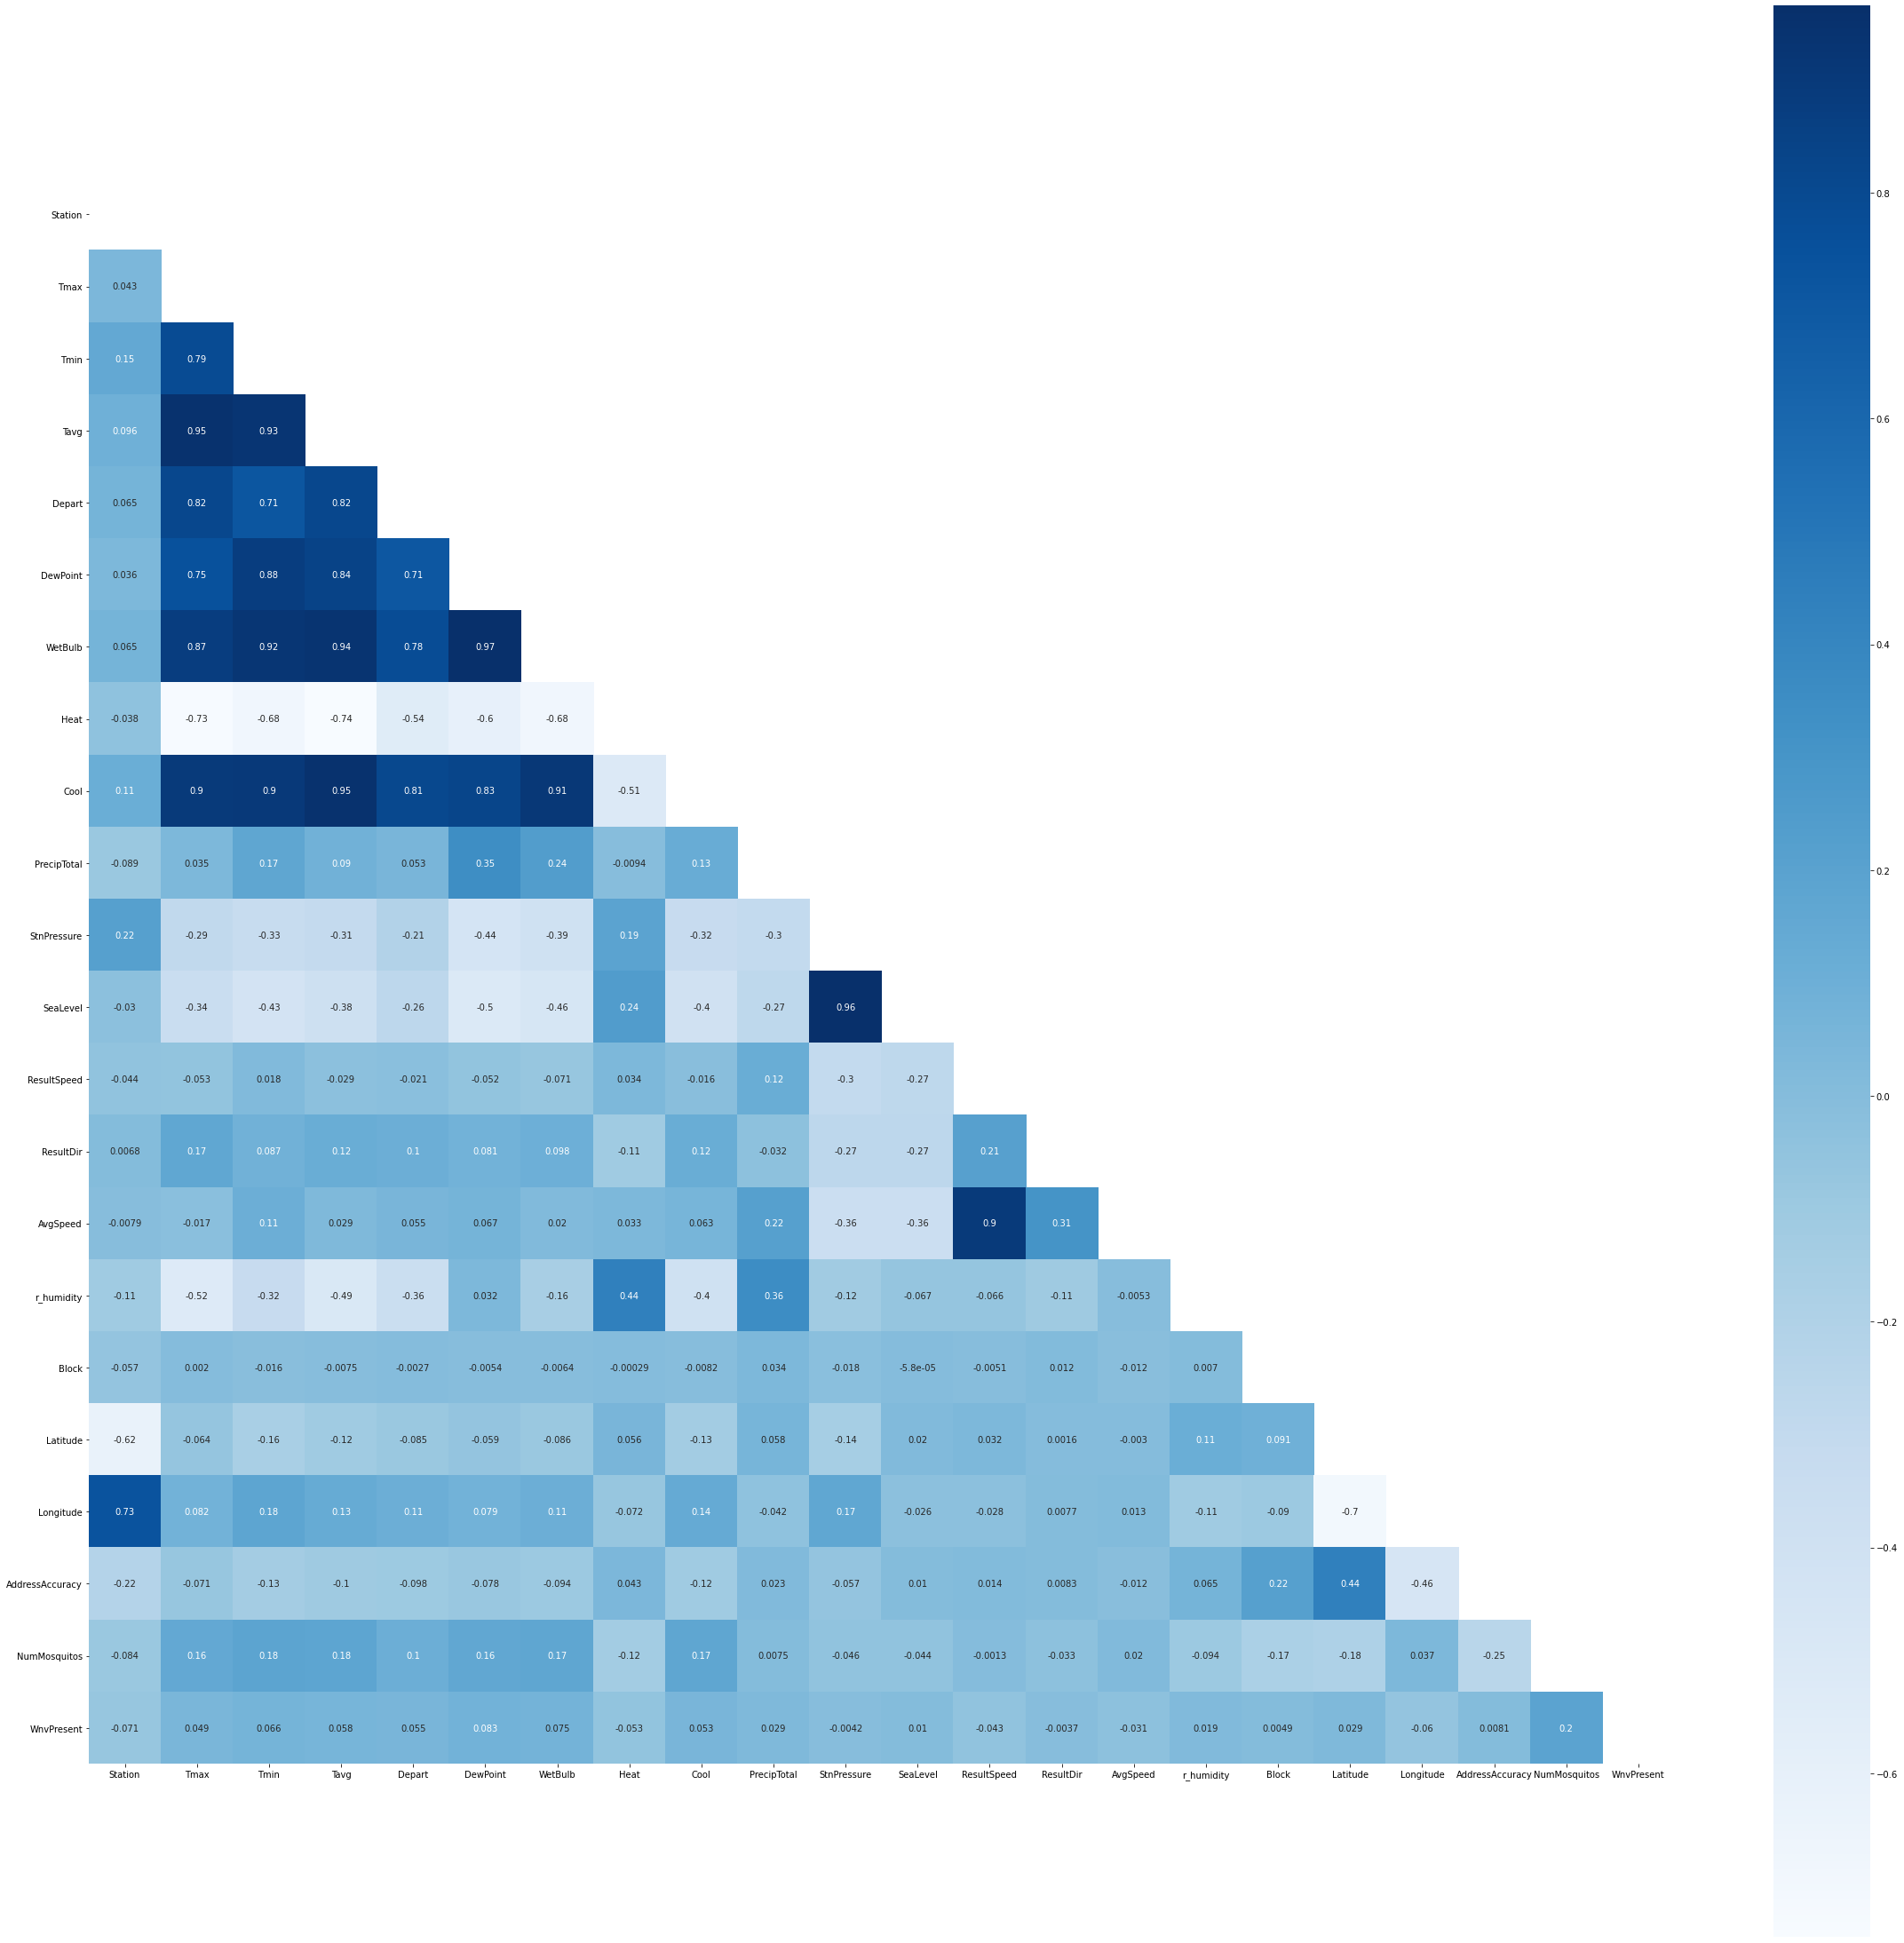

In [ ]:
mask = np.triu(np.ones_like(train_weather[features].corr(), dtype=np.bool))
# mask = mask[1:, :-1]
# corr = train_weather[features].corr().iloc[1:,:-1].copy()
plt.figure(figsize=(40,40));
sns.heatmap(train_weather[features].corr(), cmap='Blues', mask=mask, square=True, annot=True);

We will drop features which are highly correlated with each other and keep only one with the highest correlation with target variable in our analysis. 
- **Tmax, Tmin**: they are highly correlated Tavg
- **WetBulb**: highly correlated with DewPoint
- **Cool and Heat**: highly correlated with Tmax, Tmin, Tavg, and Wetbulb
- **StnPressure**: highly correlated with Sealevel
- **ResultSpeed**: highly correlated with AverageSpeed

In [ ]:
to_remove = ['Tmax', 'Tmax_1week', 'Tmax_2week', 
             'Tmin', 'Tmin_1week', 'Tmin_2week', 
             'WetBulb', 'WetBulb_1week', 'WetBulb_2week', 
             'Cool', 'Cool_1week', 'Cool_2week',
             'StnPressure', 'StnPressure_1week', 'StnPressure_2week',
             'ResultSpeed', 'ResultSpeed_1week', 'ResultSpeed_2week',
             'Heat', 'Heat_1week', 'Heat_2week']

In [ ]:
features = train_weather.columns

In [ ]:
features = [feature for feature in features if feature not in to_remove]

In [ ]:
train_weather = train_weather[features]

## Exploratory Data Analysis
Separating features into different categories

In [ ]:
print('Total number of features: {}'.format(len(train_weather.columns)))
train_weather.columns

Total number of features: 34


Index(['Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy',
       'NumMosquitos', 'WnvPresent', 'Station', 'Tavg', 'Depart', 'DewPoint',
       'Sunrise', 'Sunset', 'CodeSum', 'PrecipTotal', 'SeaLevel', 'ResultDir',
       'AvgSpeed', 'r_humidity', 'Tavg_1week', 'Tavg_2week', 'DewPoint_1week',
       'DewPoint_2week', 'PrecipTotal_1week', 'PrecipTotal_2week',
       'AvgSpeed_1week', 'AvgSpeed_2week', 'r_humidity_1week',
       'r_humidity_2week'],
      dtype='object')

In [ ]:
time_var = ['Date']
species_var = ['Species','NumMosquitos']
loc_var = ['Latitude','Longitude','Address','Street','Trap',
           'AddressNumberAndStreet','Block','AddressAccuracy']
temp_var = ['Tavg','Tavg_1week','Tavg_2week',
            'Depart','Sunrise','Sunset']
humidity_var = ['DewPoint','DewPoint_1week','DewPoint_2week',
                'r_humidity','r_humidity_1week', 'r_humidity_2week']
precip_var = ['PrecipTotal','PrecipTotal_1week','PrecipTotal_2week','SeaLevel']
wind_var = ['ResultDir','AvgSpeed','AvgSpeed_1week','AvgSpeed_2week']
other = ['CodeSum','Station']

In [ ]:
len(time_var)+len(species_var)+len(loc_var)+len(temp_var)+len(humidity_var)+len(precip_var)+len(wind_var)+len(other)

33

33 features excluding our target variable.

### Understanding Target Variable

In [ ]:
train_weather['WnvPresent'].value_counts(normalize=True)

0   0.948
1   0.052
Name: WnvPresent, dtype: float64

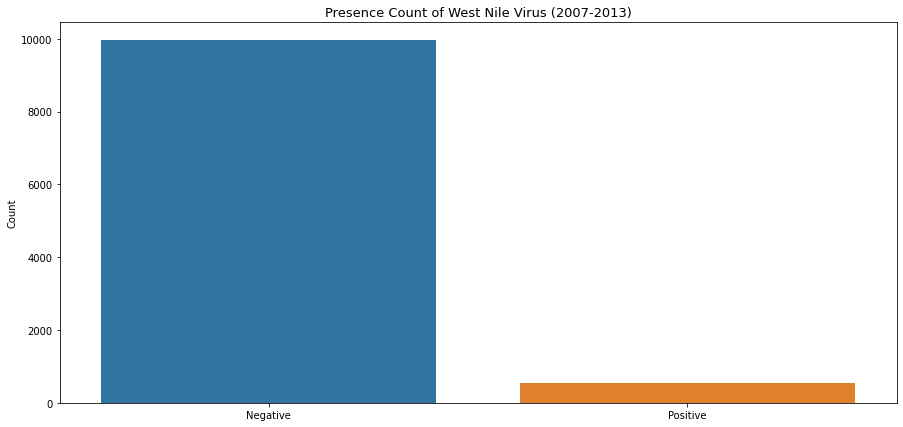

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(x=['Negative', 'Positive'], y=train_weather['WnvPresent'].value_counts().values);
plt.title('Presence Count of West Nile Virus (2007-2013)', fontsize=13);
plt.ylabel('Count');

>Target variable is an **extremely imbalanced** two-class categorical variable and the dominant class is negative class. <br> This gives us **baseline score 0.948** when our model is trying to predict negative class only. 

### Time Variables

In [ ]:
train_weather[time_var].dtypes

Date    object
dtype: object

In [ ]:
train_weather['Date'].nunique()

95

Notice that there are 95 unique dates which mosquito traps are tested for whether mosquitoes captured are carrying virus or not. We will convert `'Date'` column to `datetime` object to extract useful information for our analysis.

In [ ]:
train_weather['Date'] = pd.to_datetime(train_weather['Date'])
train_weather['Year'] = pd.DatetimeIndex(train_weather['Date']).year
train_weather['Month'] = pd.DatetimeIndex(train_weather['Date']).month
train_weather['Week'] = pd.DatetimeIndex(train_weather['Date']).week
train_weather['Day'] = pd.DatetimeIndex(train_weather['Date']).day

Visualize relationships between target variable and time variables

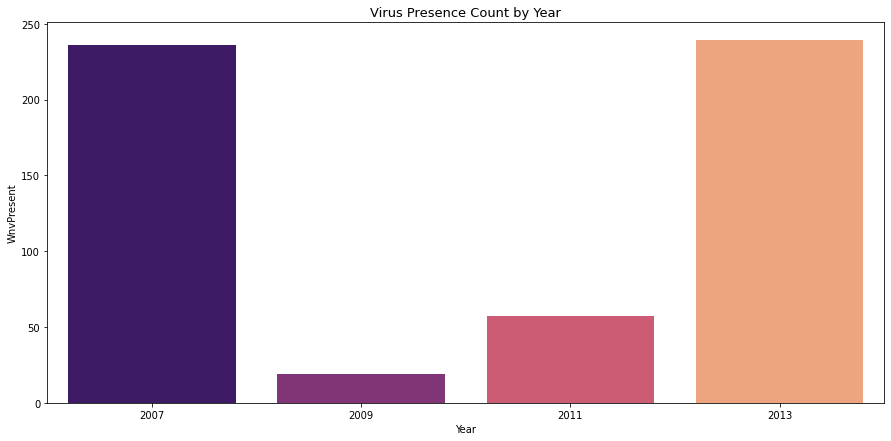

In [ ]:
plt.figure(figsize=(15,7));
sns.barplot(x='Year', y='WnvPresent', data=train_weather, palette='magma', ci=None, estimator=sum);
plt.title('Virus Presence Count by Year', fontsize=13);

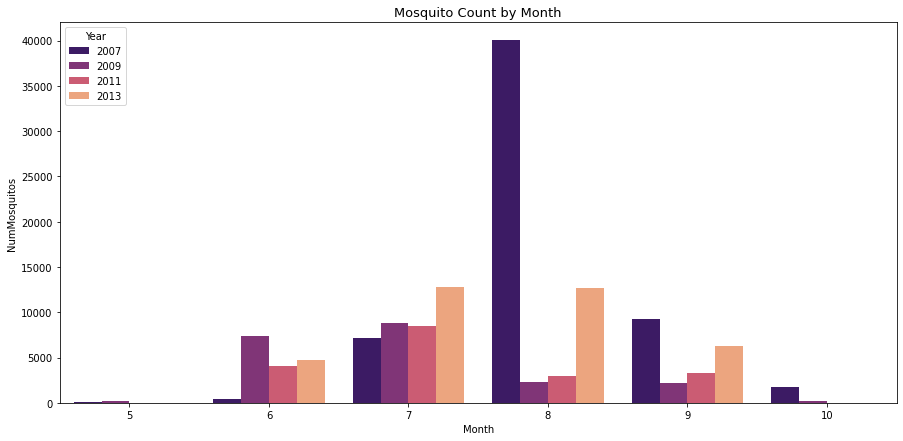

In [ ]:
plt.figure(figsize=(15,7));
sns.barplot(x='Month', y='NumMosquitos', hue='Year', data=train_weather, palette='magma', ci=None, estimator=sum);
plt.title('Mosquito Count by Month', fontsize=13);

>**Observations:**
- It is observed to have West Nile Virus(WNV) outbreak in year 2007 and 2013.
- Year 2009 has the lowest number of mosquitoes carrying WNV. This means that **mosquito control measures were effective in year 2009.**
- There is a significant increase in number of mosquitoes carrying WNV in year 2013. Further analysis needs to be done to understand the reasons. 
- From mosquito count by month plot, it is observed that mosquitoes are likely to **breed in summer** from **June to September.** 

### Species Variables

In [ ]:
train_weather[species_var].dtypes

Species         object
NumMosquitos     int64
dtype: object

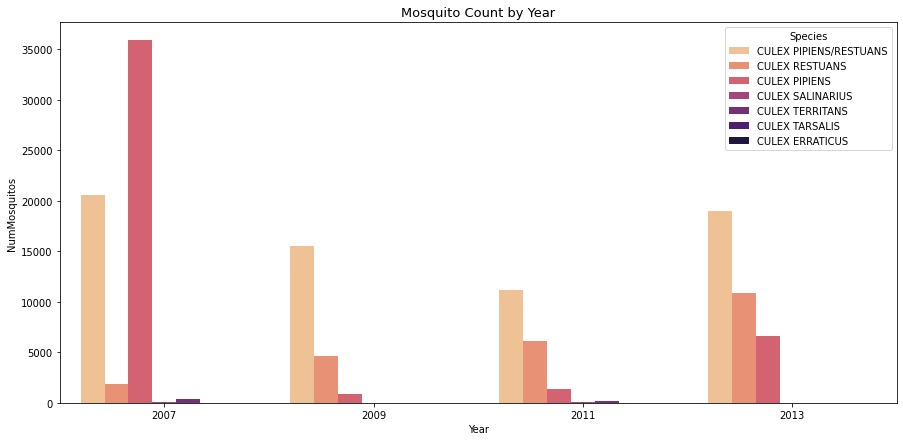

In [ ]:
plt.figure(figsize=(15,7));
sns.barplot(x='Year', y='NumMosquitos', hue='Species', data=train_weather, palette='magma_r', ci=None, estimator=sum);
plt.title('Mosquito Count by Year', fontsize=13);

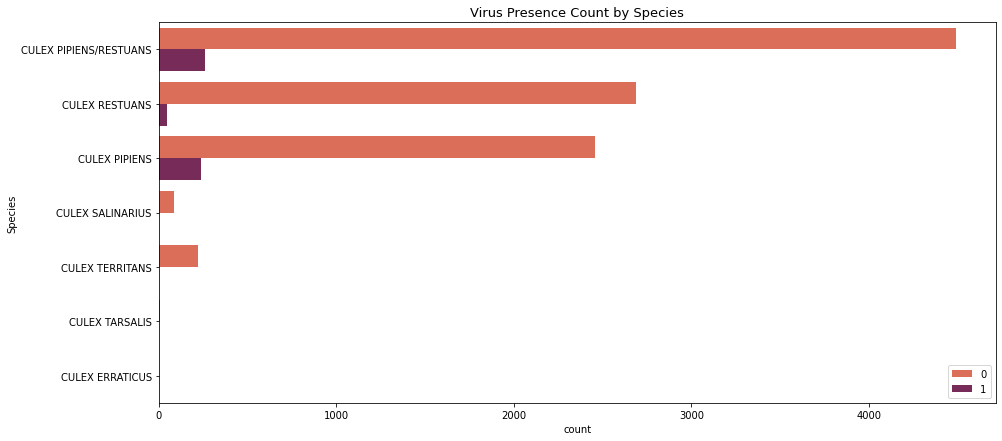

In [ ]:
plt.figure(figsize=(15,7));
sns.countplot(y='Species', hue='WnvPresent', data=train_weather, palette='rocket_r');
plt.title('Virus Presence Count by Species', fontsize=13);
plt.legend(loc='lower right');

>**Observations:**
- There are 6 species observed in this dataset. 
- Majority of mosquitoes caught are **pipiens** and **restuans**. 
- **Only pipiens and restuans are carrying WNV.** 
- Number of mosquitoes is highest in year 2007. 

### Location Variables

In [ ]:
train_weather[loc_var].dtypes

Latitude                  float64
Longitude                 float64
Address                    object
Street                     object
Trap                       object
AddressNumberAndStreet     object
Block                       int64
AddressAccuracy             int64
dtype: object

In [ ]:
print('Number of unique street names is           {}'.format(train_weather['Street'].nunique()))
print('Number of unique Address is                {}'.format(train_weather['Address'].nunique()))
print('Number of unique AddressNumber & Street is {}'.format(train_weather['AddressNumberAndStreet'].nunique()))
print('Number of unique Trap is                   {}'.format(train_weather['Trap'].nunique()))

Number of unique street names is           128
Number of unique Address is                138
Number of unique AddressNumber & Street is 138
Number of unique Trap is                   136


In [ ]:
train_weather.drop(columns=['Address', 'Street', 'AddressNumberAndStreet',
                            'Trap', 'Block', 'AddressAccuracy'], inplace=True)

>**Observations:**
- There are 138 unique locations in train dataset. 
- Trap label is categorical variable and will be OneHotEnconded in later analysis. 
- AddressAccuracy will not be useful in our virus prediction.
- We will drop 'Address and 'AddressNumberAndStreet', 'Trap', 'Block', 'AddressAccuracy' and keep only latitude and longitude. 

### Temperature Variables

In [ ]:
train_weather[temp_var].dtypes

Tavg                   int64
Tavg_1week           float64
Tavg_2week           float64
Depart               float64
Sunrise       datetime64[ns]
Sunset        datetime64[ns]
dtype: object

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


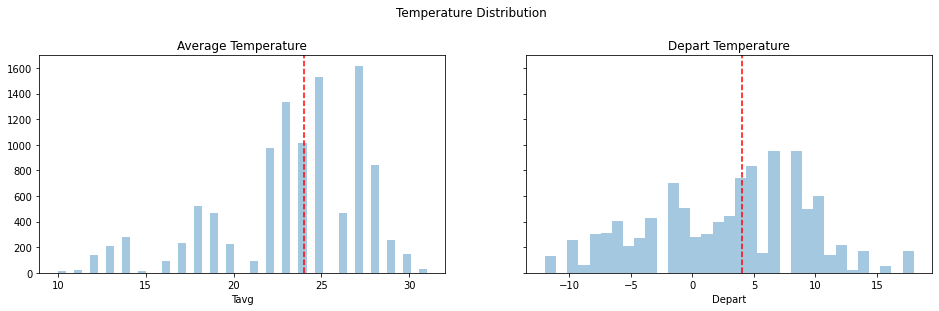

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,4), sharey=True)

sns.distplot(train_weather['Tavg'], kde=False, ax=ax[0])
sns.distplot(train_weather['Depart'], kde=False, ax=ax[1])

ax[0].set_title('Average Temperature')
ax[0].axvline(train_weather['Tavg'].median(), color='r', linestyle='--')
ax[1].set_title('Depart Temperature')
ax[1].axvline(train_weather['Depart'].median(), color='r', linestyle='--')

plt.suptitle('Temperature Distribution', y=1.05)
plt.show()

**Define plotting function.**

In [ ]:
def plot_it (col_list):
    fig, ax = plt.subplots(nrows=len(col_list), ncols=1, figsize=(16,5*len(col_list)), sharey=True)

    for i, col in enumerate(col_list):
        sns.lineplot(x='Date', y='NumMosquitos', data=train_weather, ax=ax[i], label='NumMosquitos')
        sns.lineplot(x='Date', y=col, data=train_weather, ax=ax[i], label=col)
        ax[i].set_title(f"relationship between {col} and mosquito count")

    plt.show();

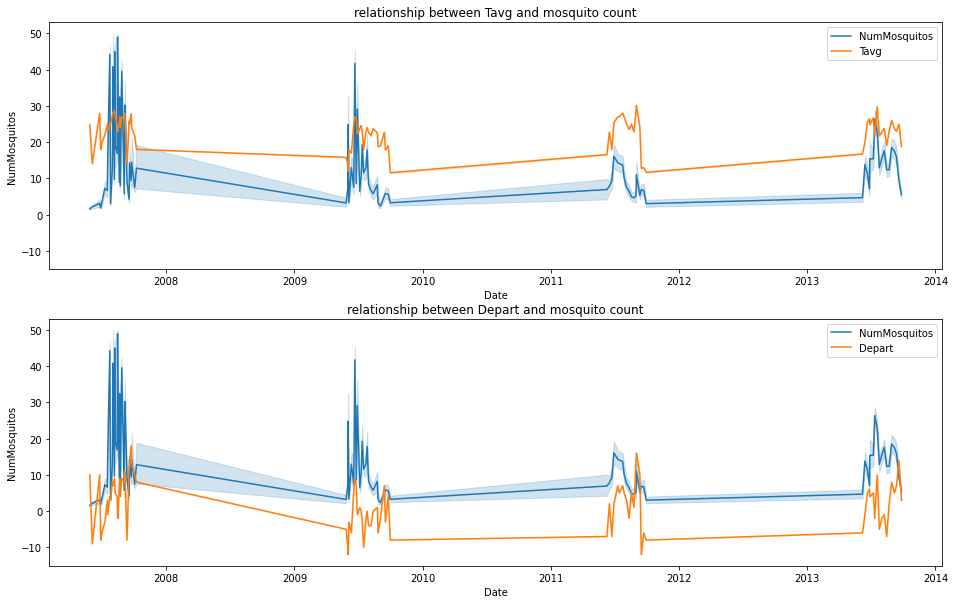

In [ ]:
plot_it(['Tavg', 'Depart'])

>Observations:
- Temperature of Chicago ranges from 10°C to 35°C and mosquito is able to emerge from larvae between 18°C and 32°C. This makes Chicago WNV prone. 
- Depart temperature ranges from -10°C to 20°C with mean centered around 4°C. This indicates that Chicago is getting warmer over the years.

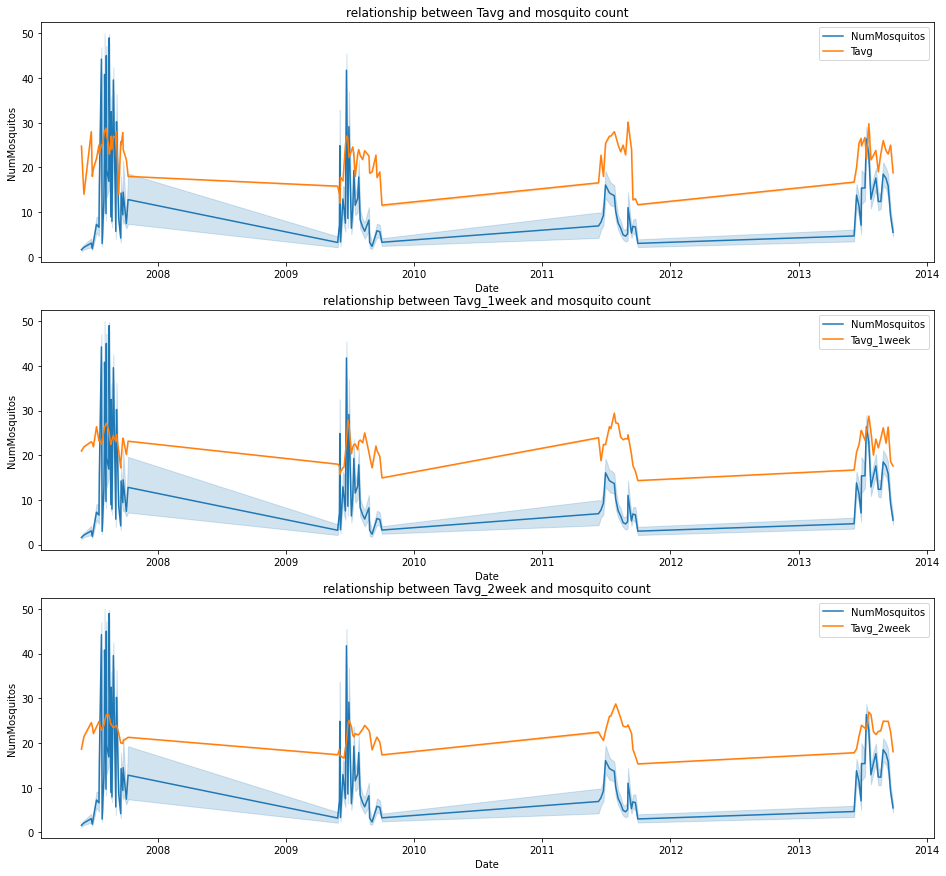

In [ ]:
plot_it(['Tavg', 'Tavg_1week', 'Tavg_2week'])

>Oberservations: 
- The above graphs shows strong correlation between average temperature & mosquito count and depart temperature & mosquito count
- It is observed that mosquito count follows more closely to 1 week rolling data of average temperature and depart temperature. This indicates that 1 week rolling data are more accurate in predicting our target variable. 

In [ ]:
def daylight_cal(Sunset, Sunrise):
    return (round((Sunset-Sunrise).total_seconds()/(60*60),1))

In [ ]:
train_weather['daylight'] = train_weather.apply(lambda x: daylight_cal(x['Sunset'], x['Sunrise']), axis=1)

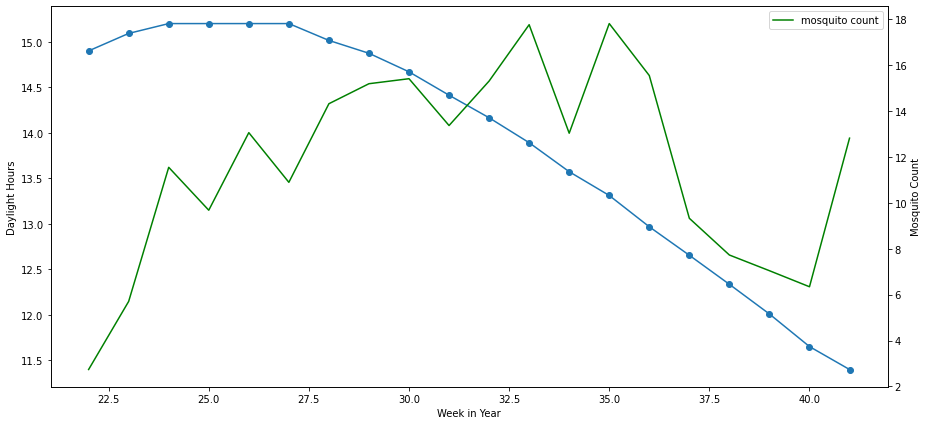

In [ ]:
fig, ax1 = plt.subplots(figsize=(15,7));

ax2 = ax1.twinx()
ax1.plot(train_weather.groupby('Week').mean()['daylight'], 'o-')
ax2.plot(train_weather.groupby('Week').mean()['NumMosquitos'], 'g-', label='mosquito count')
ax1.set_xlabel('Week in Year')
ax1.set_ylabel('Daylight Hours')
ax2.set_ylabel('Mosquito Count')

ax2.legend()

plt.show()

In [ ]:
train_weather.drop(columns=['daylight', 'Sunrise', 'Sunset'], inplace=True)

>Observation:
- daylight hours has no relationship with mosquito count. Therefore, we will drop it. 

### Humidity Variables

In [ ]:
humidity_var

['DewPoint',
 'DewPoint_1week',
 'DewPoint_2week',
 'r_humidity',
 'r_humidity_1week',
 'r_humidity_2week']

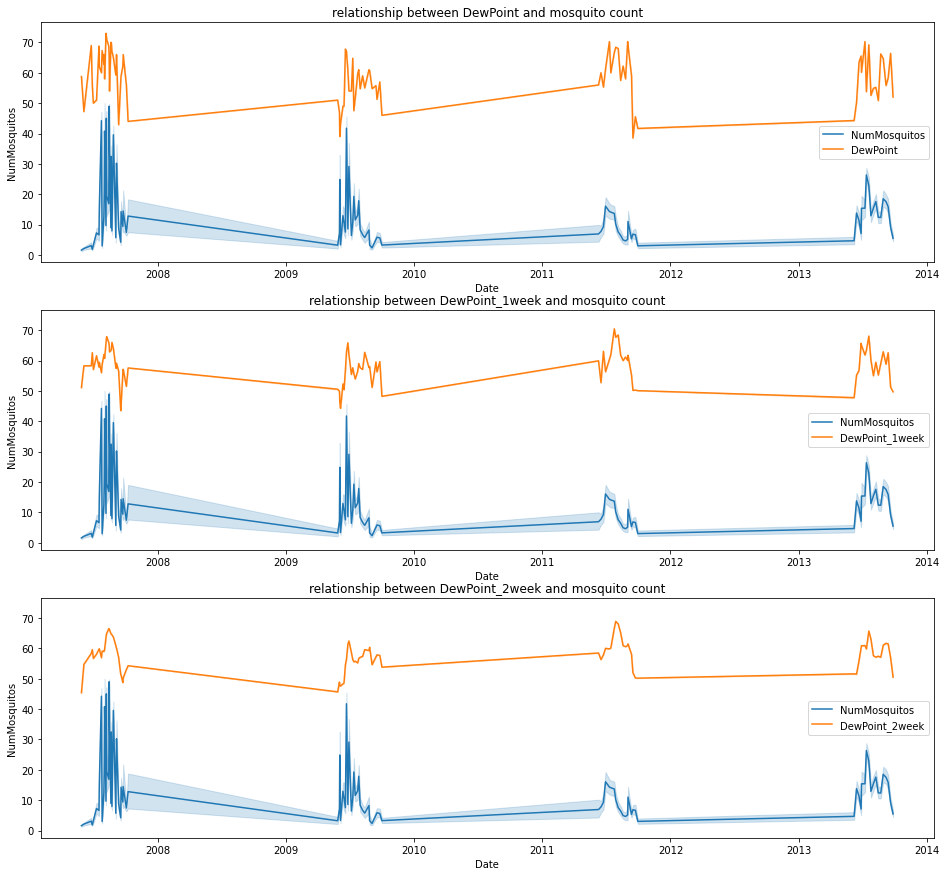

In [ ]:
plot_it(['DewPoint', 'DewPoint_1week', 'DewPoint_2week'])

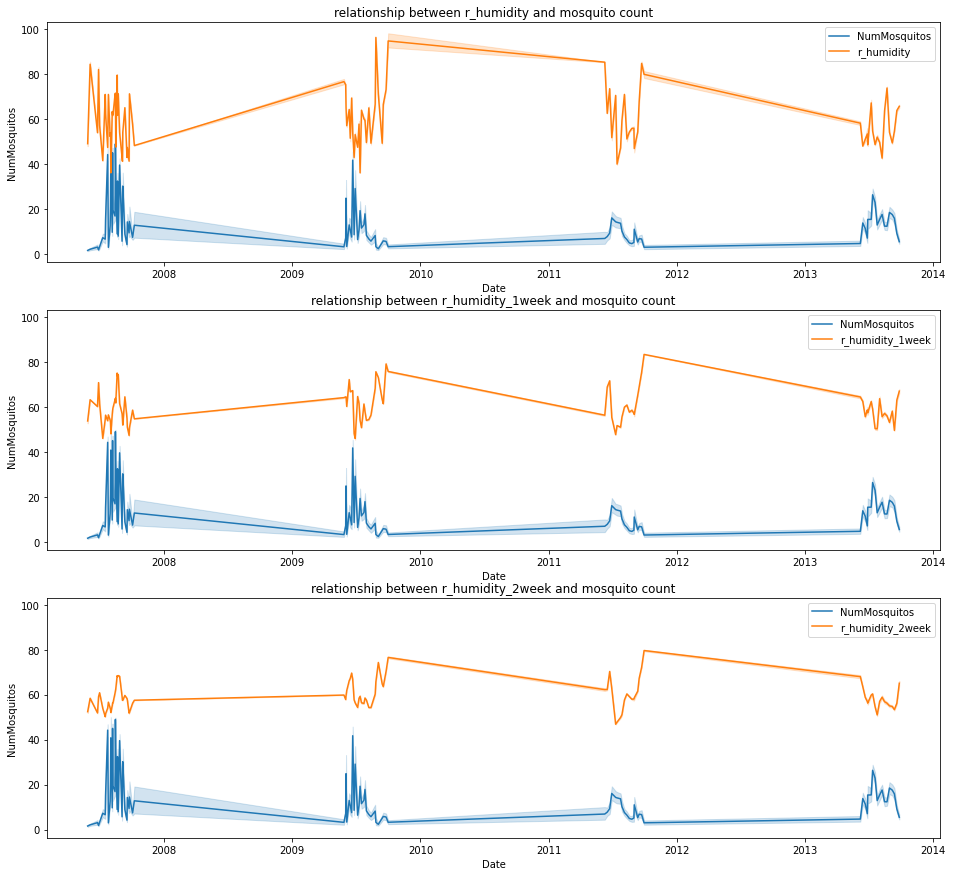

In [ ]:
plot_it(['r_humidity', 'r_humidity_1week', 'r_humidity_2week'])

>Observation:
- Relative humidity is closely related to mosquito count. Higher relative humidity is more conducive for mosquito to breed and emerge from larvae. However, when relative humidity exceeds a certain threshold, it indicates heavy rain which will wash away the mosquito larvae and this will lead to a drop in mosquito count. 

### Precipitation 

In [ ]:
precip_var

['PrecipTotal', 'PrecipTotal_1week', 'PrecipTotal_2week', 'SeaLevel']

Study shows that changes in climate that accompany global warming will alter the transmission risk of many vector-borne infectious diseases such as West Nile Virus in different parts of the world. Global warming is a major factor  raising sea levels. Therefore, sealevel might be a good predictor of our targer variable. <br>
https://bmcinfectdis.biomedcentral.com/articles/10.1186/1471-2334-11-18

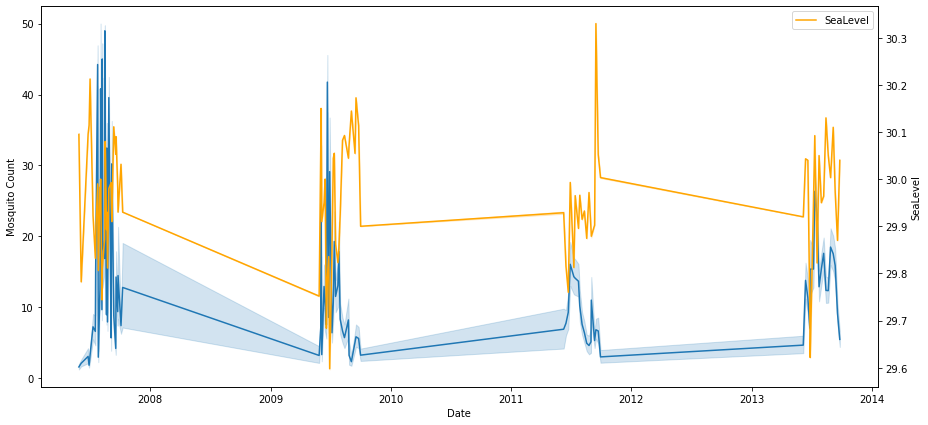

In [ ]:
fig, ax1 = plt.subplots(figsize=(15,7));

ax2 = ax1.twinx()
sns.lineplot(x='Date', y='NumMosquitos', data=train_weather, ax=ax1)
sns.lineplot(x='Date', y='SeaLevel', data=train_weather, ax=ax2, color='#ffa500', label='SeaLevel')

ax2.set_xlabel('Year')
ax1.set_ylabel('Mosquito Count')
ax2.set_ylabel('SeaLevel')

ax2.legend()

plt.show()

>Observation:
- There is observed to have a positive relationship between mosquito count and sealevel. 

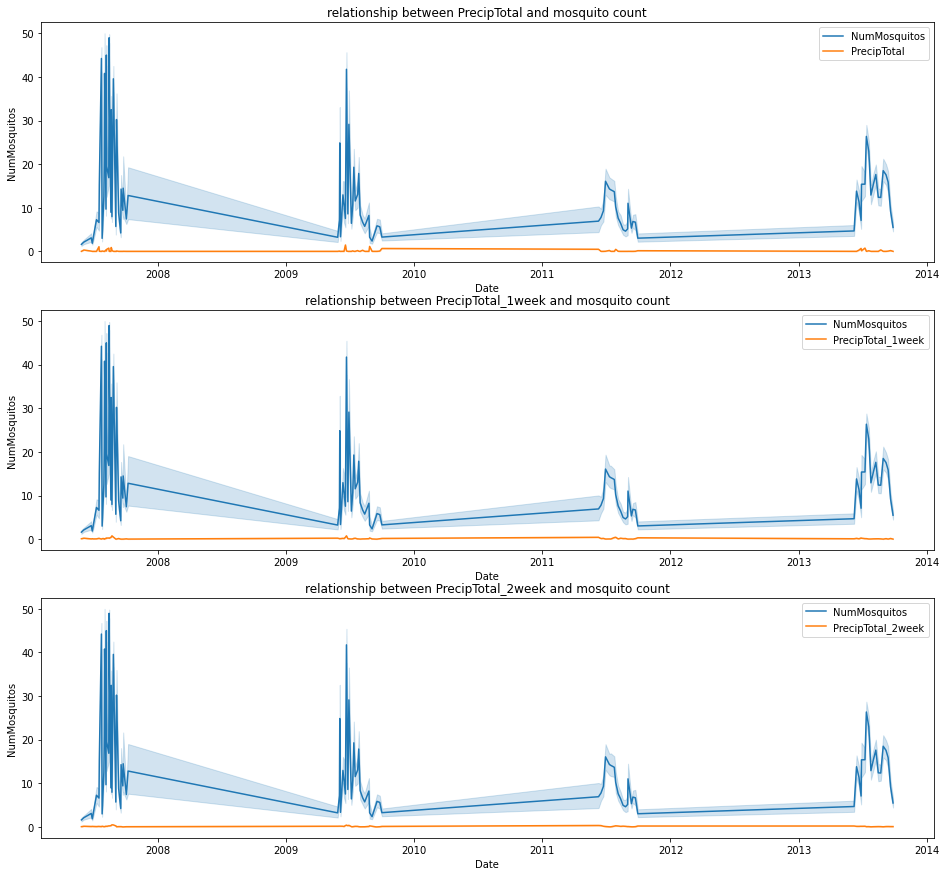

In [ ]:
plot_it(['PrecipTotal', 'PrecipTotal_1week', 'PrecipTotal_2week'])

>Observation:
- The amount of precipitation is too little to observe any relationship with mosquito count. 

### Wind Variables

In [ ]:
wind_var

['ResultDir', 'AvgSpeed', 'AvgSpeed_1week', 'AvgSpeed_2week']

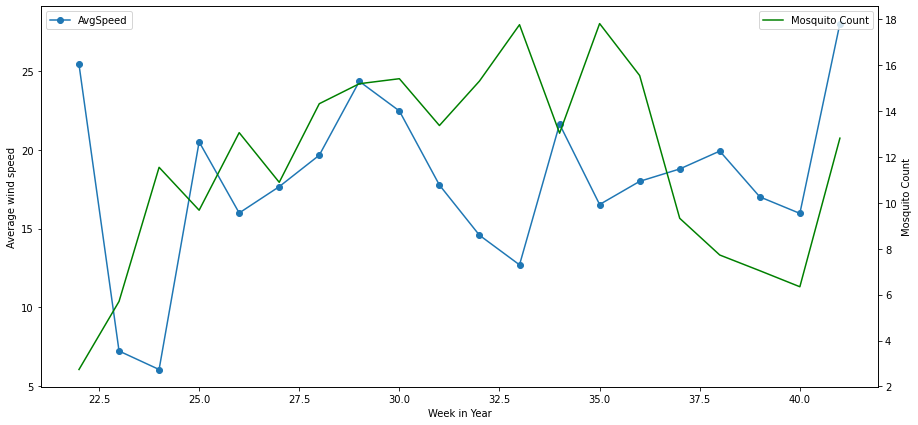

In [ ]:
fig, ax1 = plt.subplots(figsize=(15,7));

ax2 = ax1.twinx()
ax1.plot(train_weather.groupby('Week').mean()['ResultDir'], 'o-', label='AvgSpeed')
ax2.plot(train_weather.groupby('Week').mean()['NumMosquitos'], 'g-', label='Mosquito Count')

ax1.set_xlabel('Week in Year')
ax1.set_ylabel('Average wind speed')
ax2.set_ylabel('Mosquito Count')

ax1.legend()
ax2.legend()

plt.show()

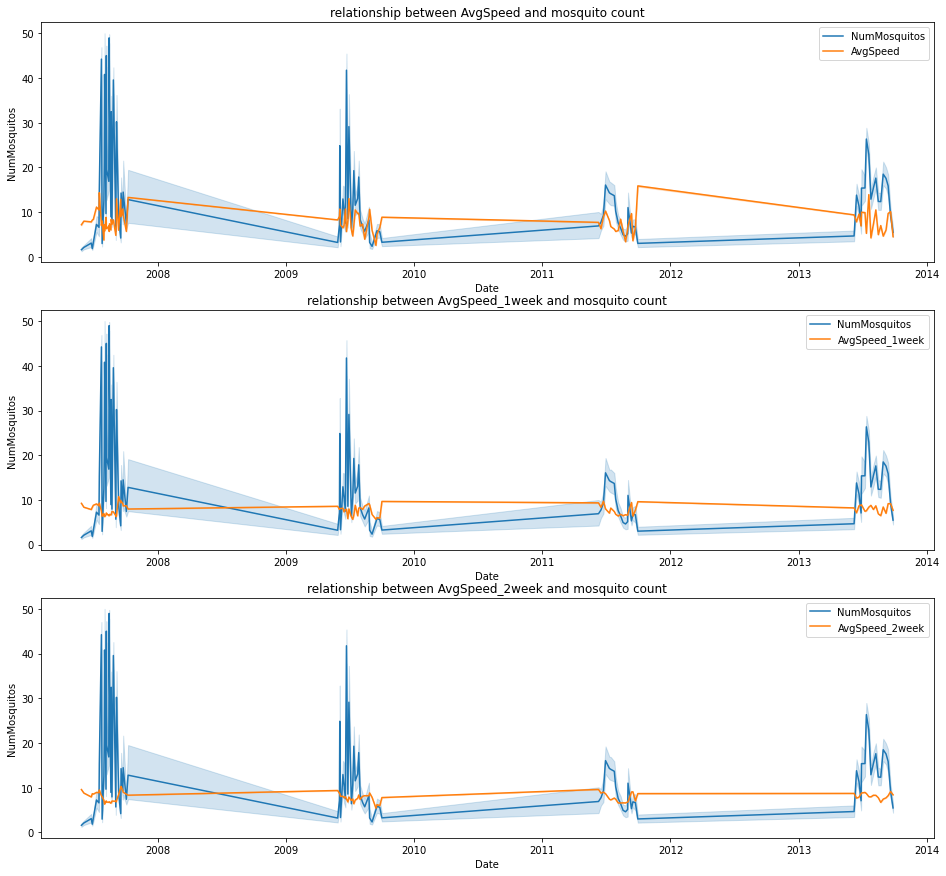

In [ ]:
plot_it(['AvgSpeed', 'AvgSpeed_1week', 'AvgSpeed_2week'])

>Observations:
- There is a clear relationship between wind speed and mosquito count. 
- Study shows that mosquito cannot locate a host or settle down if the wind speed is greater than 10 MPH. 2007 and 2013 are observed to have lower wind speed as compared to other years.

### Other Conditions

In [ ]:
other

['CodeSum', 'Station']

- codesum contains weather information which are already included in temperature, wind and precipitation variables. 
- Station number is just an indicator of which weather station is the given location getting weather data from. 
- Therefore, we will drop these two variables in our analysis.

In [ ]:
train_weather.drop(columns=['CodeSum', 'Station'], inplace=True)

In [ ]:
train_weather.columns

Index(['Date', 'Species', 'Latitude', 'Longitude', 'NumMosquitos',
       'WnvPresent', 'Tavg', 'Depart', 'DewPoint', 'PrecipTotal', 'SeaLevel',
       'ResultDir', 'AvgSpeed', 'r_humidity', 'Tavg_1week', 'Tavg_2week',
       'DewPoint_1week', 'DewPoint_2week', 'PrecipTotal_1week',
       'PrecipTotal_2week', 'AvgSpeed_1week', 'AvgSpeed_2week',
       'r_humidity_1week', 'r_humidity_2week', 'Year', 'Month', 'Week', 'Day'],
      dtype='object')

## Prepare Test File

### Merge Test and Weather Data

In [ ]:
test['dist_station1'] = test.apply(lambda x: (((x['Latitude'] - 41.995)**2) + ((x['Longitude'] - (-87.933))**2))**0.5, axis = 1 )
test['dist_station2'] = test.apply(lambda x: (((x['Latitude'] - 41.786)**2) + ((x['Longitude'] - (-87.752))**2))**0.5, axis = 1 )
test['closer_stn'] = test.apply(lambda x: 1 if x['dist_station1']<x['dist_station2'] else 2, axis = 1 )

In [ ]:
test_weather = test.merge(weather_final, how='left', left_on = ['Date', 'closer_stn'], right_on = ['Date', 'Station'])
test_weather.head(2)

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,dist_station1,dist_station2,closer_stn,Station,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,r_humidity,Tmax_1week,Tmax_2week,Tmin_1week,Tmin_2week,Tavg_1week,Tavg_2week,DewPoint_1week,DewPoint_2week,WetBulb_1week,WetBulb_2week,Heat_1week,Heat_2week,Cool_1week,Cool_2week,PrecipTotal_1week,PrecipTotal_2week,StnPressure_1week,StnPressure_2week,ResultSpeed_1week,ResultSpeed_2week,AvgSpeed_1week,AvgSpeed_2week,r_humidity_1week,r_humidity_2week
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634, USA",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.955,-87.801,9,0.138,0.176,1,1,30,17,24,7.000,56,18,0.000,9.000,1900-01-01 04:16:00,1900-01-01 19:26:00,,0.000,29.280,29.990,8.900,18,10.000,47.470,29.000,26.857,18.429,15.357,23.857,21.143,64.429,58.286,20.571,17.643,0.000,1.000,9.143,5.429,0.307,0.221,29.129,29.120,10.800,8.329,12.600,9.950,69.743,68.671
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634, USA",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.955,-87.801,9,0.138,0.176,1,1,30,17,24,7.000,56,18,0.000,9.000,1900-01-01 04:16:00,1900-01-01 19:26:00,,0.000,29.280,29.990,8.900,18,10.000,47.470,29.000,26.857,18.429,15.357,23.857,21.143,64.429,58.286,20.571,17.643,0.000,1.000,9.143,5.429,0.307,0.221,29.129,29.120,10.800,8.329,12.600,9.950,69.743,68.671


In [ ]:
test_weather['Date'] = pd.to_datetime(test_weather['Date'])
test_weather['Year'] = pd.DatetimeIndex(test_weather['Date']).year
test_weather['Month'] = pd.DatetimeIndex(test_weather['Date']).month
test_weather['Week'] = pd.DatetimeIndex(test_weather['Date']).week
test_weather['Day'] = pd.DatetimeIndex(test_weather['Date']).day

In [ ]:
test_weather.drop(columns=['dist_station1', 'dist_station2', 'closer_stn'], inplace=True)

In [ ]:
test_weather.shape

(116293, 58)

In [ ]:
# check for null values
test_weather.isnull().sum().sum()

0

>The combined dataset has 
- **1 target variable and 58 features** in total including original ones and features from weather data.<br>
- **116,293 data entries.**

### EDA on Test Data

In [ ]:
train_features = list(train_weather.columns)
test_features = list(test_weather.columns)

In [ ]:
difference = [feature for feature in test_features if feature not in train_features]

In [ ]:
difference.remove('Id')

In [ ]:
test_weather.drop(columns=difference, inplace=True)

In [ ]:
test_weather.isnull().sum().sum()

0

## Prepare CSV Files for Modeling

In [ ]:
train_weather.isnull().sum().sum()

0

In [ ]:
test_weather.isnull().sum().sum()

0

In [ ]:
# train_weather.to_csv('assets/train_weather_cleaned.csv', index=False)
# test_weather.to_csv('assets/test_weather_cleaned.csv', index=False)